In [ ]:
import warnings
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import DBSCAN
warnings.filterwarnings("ignore")
pd.options.display.max_colwidth = 1000
pd.options.display.max_rows = 2000
plt.style.use('seaborn-v0_8-whitegrid')

### Functions for clustering

In [ ]:
def plot_clusters(X, y):
    if y is not None:
        for cluster_label in np.unique(y):
            plt.scatter(X[y == cluster_label, 0],
                        X[y == cluster_label, 1],
                        X[y == cluster_label, 2],
                        label=str(cluster_label))
    else:
        plt.scatter(X[:, 0], X[:, 1], label='samples')

    plt.xlabel('X1', size=12)
    plt.ylabel('X2', size=12)
    plt.title('Clustering result')
    plt.xticks(size=12)
    plt.yticks(size=12)
    plt.savefig('clustering_result.png')
    plt.show()

In [ ]:
def calculate_metric(X, y_pred, k_means, n_clusters):
    sum_of_distances = 0
    for obj in range(X.shape[0]):
        distance = np.sum(np.square(X[obj, :] - k_means.cluster_centers_[y_pred[obj]]))
        sum_of_distances += distance
    return sum_of_distances / X.shape[0]


In [ ]:
economic_reports_dataset = pd.read_csv('final_wiki_annual_financial_statements_dataset.csv')

### Tickers' filtering according to Wiki data

In [ ]:
wiki_reports_dataset = pd.read_csv('NASDAQ_133_wiki_range.csv')

In [ ]:
# @title
relevant_tickers = []
for ticker in economic_reports_dataset['Ticker'].tolist():
  if ticker in wiki_reports_dataset['name'].tolist():
    relevant_tickers.append(ticker)

In [ ]:
# @title
len(relevant_tickers)

61

In [ ]:
# @title
final_relevant_wiki_tickers = pd.DataFrame({'Ticker': relevant_tickers})

In [ ]:
final_relevant_wiki_tickers

,Ticker
0,AAPL
1,ADBE
2,ADSK
3,ADTN
4,AKAM
5,ALNY
6,AMGN
7,AMZN
8,ANSS
9,ATVI


In [ ]:
pd.DataFrame.to_csv(final_relevant_wiki_tickers, 'final_relevant_wiki_tickers.csv')

### Financial reports' filtering according to Wiki data

In [ ]:
relevant_wiki_tickers = pd.read_csv('final_relevant_wiki_tickers.csv')

In [ ]:
economic_reports_dataset = economic_reports_dataset.loc[economic_reports_dataset.Ticker.isin(relevant_wiki_tickers.Ticker.tolist()), :]

In [ ]:
economic_reports_dataset

,Ticker,Total assets 2019,Operating income 2019,Net income 2019,Total assets 2018,Net income 2018,Operating income 2018,Total assets 2017,Net income 2017,Operating income 2017,Total shareholders' equity 2019,Total shareholders' equity 2018,Total shareholders' equity 2017
0,AAPL,3.385160e+11,6.393000e+10,5.525600e+10,3.657250e+11,5.953100e+10,7.089800e+10,3.753190e+11,4.835100e+10,6.134400e+10,9.048800e+10,1.071470e+11,1.340470e+11
2,ADBE,2.076240e+10,3.268121e+09,2.951458e+09,1.876868e+10,2.590774e+09,2.840369e+09,1.453556e+10,1.693954e+09,2.168095e+09,1.053016e+10,9.362114e+09,8.459869e+09
4,ADSK,4.729200e+09,-2.500000e+07,-8.080000e+07,4.113600e+09,-5.669000e+08,-5.091000e+08,4.798100e+09,-5.821000e+08,-4.996000e+08,-2.109000e+08,-2.560000e+08,7.336000e+08
5,ADTN,5.451180e+08,-3.996300e+07,-5.298200e+07,6.280270e+08,-1.934200e+07,-4.542200e+07,6.690940e+08,2.384000e+07,3.773700e+07,3.804260e+08,4.462790e+08,4.979110e+08
7,AKAM,7.006886e+09,5.489180e+08,4.780350e+08,5.461770e+09,2.983730e+08,3.624990e+08,4.602844e+09,2.183210e+08,3.162190e+08,3.657958e+09,3.191860e+09,3.310723e+09
8,ALNY,2.395134e+09,-9.394310e+08,-8.861160e+08,1.574802e+09,-7.614970e+08,-8.146730e+08,1.994730e+09,-4.908740e+08,-5.000880e+08,1.438692e+09,1.301965e+09,1.766431e+09
13,AMGN,5.970700e+10,9.674000e+09,7.842000e+09,6.641600e+10,8.394000e+09,1.026300e+10,7.995400e+10,1.979000e+09,9.973000e+09,9.673000e+09,1.250000e+10,2.524100e+10
14,AMZN,2.252480e+11,1.454100e+10,1.158800e+10,1.626480e+11,1.007300e+10,1.242100e+10,1.313100e+11,3.033000e+09,4.106000e+09,6.206000e+10,4.354900e+10,2.770900e+10
15,ANSS,4.838887e+09,5.150400e+08,4.512950e+08,3.265964e+09,4.193750e+08,4.765740e+08,2.941623e+09,2.592510e+08,3.907280e+08,3.453379e+09,2.649547e+09,2.245831e+09
17,ATVI,1.984500e+10,1.607000e+09,1.503000e+09,1.783500e+10,1.813000e+09,1.988000e+09,1.866800e+10,2.730000e+08,1.309000e+09,1.280500e+10,1.135700e+10,9.462000e+09


In [ ]:
economic_reports_dataset.set_index('Ticker')

,Total assets 2019,Operating income 2019,Net income 2019,Total assets 2018,Net income 2018,Operating income 2018,Total assets 2017,Net income 2017,Operating income 2017,Total shareholders' equity 2019,Total shareholders' equity 2018,Total shareholders' equity 2017
Ticker,,,,,,,,,,,,
AAPL,3.385160e+11,6.393000e+10,5.525600e+10,3.657250e+11,5.953100e+10,7.089800e+10,3.753190e+11,4.835100e+10,6.134400e+10,9.048800e+10,1.071470e+11,1.340470e+11
ADBE,2.076240e+10,3.268121e+09,2.951458e+09,1.876868e+10,2.590774e+09,2.840369e+09,1.453556e+10,1.693954e+09,2.168095e+09,1.053016e+10,9.362114e+09,8.459869e+09
ADSK,4.729200e+09,-2.500000e+07,-8.080000e+07,4.113600e+09,-5.669000e+08,-5.091000e+08,4.798100e+09,-5.821000e+08,-4.996000e+08,-2.109000e+08,-2.560000e+08,7.336000e+08
ADTN,5.451180e+08,-3.996300e+07,-5.298200e+07,6.280270e+08,-1.934200e+07,-4.542200e+07,6.690940e+08,2.384000e+07,3.773700e+07,3.804260e+08,4.462790e+08,4.979110e+08
AKAM,7.006886e+09,5.489180e+08,4.780350e+08,5.461770e+09,2.983730e+08,3.624990e+08,4.602844e+09,2.183210e+08,3.162190e+08,3.657958e+09,3.191860e+09,3.310723e+09
ALNY,2.395134e+09,-9.394310e+08,-8.861160e+08,1.574802e+09,-7.614970e+08,-8.146730e+08,1.994730e+09,-4.908740e+08,-5.000880e+08,1.438692e+09,1.301965e+09,1.766431e+09
AMGN,5.970700e+10,9.674000e+09,7.842000e+09,6.641600e+10,8.394000e+09,1.026300e+10,7.995400e+10,1.979000e+09,9.973000e+09,9.673000e+09,1.250000e+10,2.524100e+10
AMZN,2.252480e+11,1.454100e+10,1.158800e+10,1.626480e+11,1.007300e+10,1.242100e+10,1.313100e+11,3.033000e+09,4.106000e+09,6.206000e+10,4.354900e+10,2.770900e+10
ANSS,4.838887e+09,5.150400e+08,4.512950e+08,3.265964e+09,4.193750e+08,4.765740e+08,2.941623e+09,2.592510e+08,3.907280e+08,3.453379e+09,2.649547e+09,2.245831e+09


In [ ]:
print(len(economic_reports_dataset.index.tolist()))

61


## Statistical clustering

In [ ]:
len(clustering_dataset.Ticker)

61

### 2019

In [ ]:
clustering_dataset = pd.DataFrame()
clustering_dataset['Ticker'] = economic_reports_dataset['Ticker']
clustering_dataset['Net income 2019 / Total assets 2019'] = economic_reports_dataset['Net income 2019'] / economic_reports_dataset['Total assets 2019']
clustering_dataset['Net income 2019 / Total shareholders\' equity 2019'] = economic_reports_dataset['Net income 2019'] / economic_reports_dataset['Total shareholders\' equity 2019']
clustering_dataset['Net income 2019 / Operating income 2019'] = economic_reports_dataset['Net income 2019'] / economic_reports_dataset['Operating income 2019']

#### Assets classification

In [ ]:
categories_assets = pd.qcut(clustering_dataset['Net income 2019 / Total assets 2019'], q=3, labels = ['Low', 'Middle', 'High'])

In [ ]:
clustering_dataset['Categories assets'] = categories_assets

In [ ]:
categories_assets_low = clustering_dataset.loc[clustering_dataset['Categories assets'] == 'Low', 'Ticker'].tolist()
print(clustering_dataset.loc[clustering_dataset['Categories assets'] == 'Low', 'Ticker'].tolist())

['ADSK', 'ADTN', 'ALNY', 'BJRI', 'BSET', 'CONN', 'EXPE', 'IRDM', 'JBLU', 'MAT', 'MSTR', 'MYGN', 'SAVE', 'SCHN', 'SGEN', 'SRCL', 'SSNC', 'VIA', 'WDC', 'WYNN', 'ZEUS']


In [ ]:
categories_assets_middle = clustering_dataset.loc[clustering_dataset['Categories assets'] == 'Middle', 'Ticker'].tolist()
print(clustering_dataset.loc[clustering_dataset['Categories assets'] == 'Middle', 'Ticker'].tolist())

['AKAM', 'AMZN', 'ANSS', 'ATVI', 'CHSCP', 'COST', 'CSCO', 'FTNT', 'GILD', 'GOOGL', 'JBHT', 'MDLZ', 'MTEX', 'NATI', 'NDAQ', 'NFLX', 'OLED', 'SNPS', 'TRIP', 'VRSK']


In [ ]:
categories_assets_high = clustering_dataset.loc[clustering_dataset['Categories assets'] == 'High', 'Ticker'].tolist()
print(clustering_dataset.loc[clustering_dataset['Categories assets'] == 'High', 'Ticker'].tolist())

['AAPL', 'ADBE', 'AMGN', 'BIIB', 'CDNS', 'EXPD', 'GRMN', 'INTC', 'INTU', 'LRCX', 'LULU', 'LXRX', 'MSFT', 'MU', 'NTAP', 'NVDA', 'REGN', 'STX', 'SWKS', 'TXN']


<Axes: title={'center': 'Net income 2019 / Total assets 2019 value distribution'}, xlabel='Net income 2019 / Total assets 2019', ylabel='Amount of companies'>

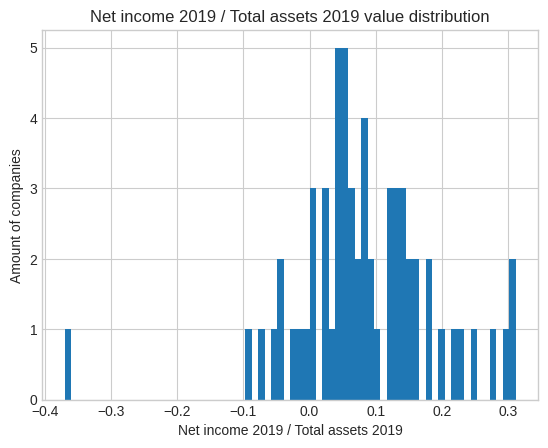

In [ ]:
plt.title('Net income 2019 / Total assets 2019 value distribution')
plt.xlabel('Net income 2019 / Total assets 2019')
plt.ylabel('Amount of companies')
clustering_dataset['Net income 2019 / Total assets 2019'].hist(bins=70)

#### Shareholders' equity classification

In [ ]:
categories_shareholders_equity = pd.qcut(clustering_dataset['Net income 2019 / Total shareholders\' equity 2019'], q=3, labels = ['Low', 'Middle', 'High'])

In [ ]:
clustering_dataset['Categories equity'] = categories_shareholders_equity

In [ ]:
categories_shareholders_equity_low = clustering_dataset.loc[clustering_dataset['Categories equity'] == 'Low', 'Ticker'].tolist()
print(clustering_dataset.loc[clustering_dataset['Categories equity'] == 'Low', 'Ticker'].tolist())

['ADTN', 'ALNY', 'ATVI', 'BSET', 'CHSCP', 'CONN', 'IRDM', 'JBLU', 'MAT', 'MSTR', 'MTEX', 'MYGN', 'SCHN', 'SGEN', 'SNPS', 'SRCL', 'SSNC', 'TRIP', 'WDC', 'WYNN', 'ZEUS']


In [ ]:
categories_shareholders_equity_middle = clustering_dataset.loc[clustering_dataset['Categories equity'] == 'Middle', 'Ticker'].tolist()
print(clustering_dataset.loc[clustering_dataset['Categories equity'] == 'Middle', 'Ticker'].tolist())

['AKAM', 'AMZN', 'ANSS', 'BJRI', 'COST', 'EXPE', 'GILD', 'GOOGL', 'GRMN', 'JBHT', 'MDLZ', 'MU', 'NATI', 'NDAQ', 'OLED', 'REGN', 'SAVE', 'SWKS', 'VIA', 'VRSK']


In [ ]:
categories_shareholders_equity_high = clustering_dataset.loc[clustering_dataset['Categories equity'] == 'High', 'Ticker'].tolist()
print(clustering_dataset.loc[clustering_dataset['Categories equity'] == 'High', 'Ticker'].tolist())

['AAPL', 'ADBE', 'ADSK', 'AMGN', 'BIIB', 'CDNS', 'CSCO', 'EXPD', 'FTNT', 'INTC', 'INTU', 'LRCX', 'LULU', 'LXRX', 'MSFT', 'NFLX', 'NTAP', 'NVDA', 'STX', 'TXN']


<Axes: title={'center': "Net income 2019 / Total shareholders' equity 2019 value distribution"}, xlabel="Net income 2019 / Total shareholders' equity 2019", ylabel='Amount of companies'>

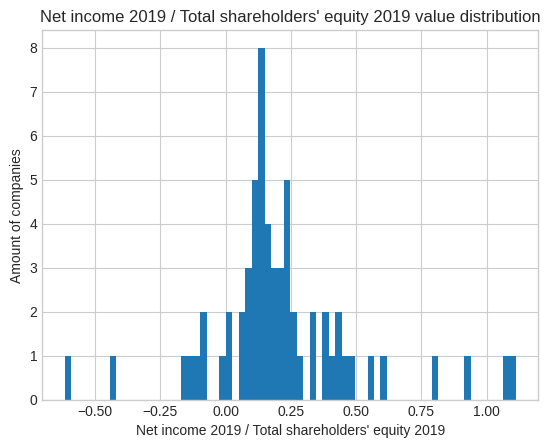

In [ ]:
plt.title('Net income 2019 / Total shareholders\' equity 2019 value distribution')
plt.xlabel('Net income 2019 / Total shareholders\' equity 2019')
plt.ylabel('Amount of companies')
clustering_dataset['Net income 2019 / Total shareholders\' equity 2019'].hist(bins=70)

#### Operating income classification

In [ ]:
categories_operating_income = pd.qcut(clustering_dataset['Net income 2019 / Operating income 2019'], q=2, labels = ['Low', 'High'])

In [ ]:
clustering_dataset['Categories operating income'] = categories_operating_income

In [ ]:
categories_operating_income_low = clustering_dataset.loc[clustering_dataset['Categories operating income'] == 'Low', 'Ticker'].tolist()
print(clustering_dataset.loc[clustering_dataset['Categories operating income'] == 'Low', 'Ticker'].tolist())

['AAPL', 'AMGN', 'AMZN', 'BIIB', 'CONN', 'COST', 'CSCO', 'EXPD', 'EXPE', 'INTU', 'IRDM', 'JBHT', 'JBLU', 'LULU', 'MAT', 'MSTR', 'MTEX', 'MU', 'MYGN', 'NDAQ', 'NFLX', 'SAVE', 'SCHN', 'SGEN', 'SSNC', 'TRIP', 'VIA', 'VRSK', 'WDC', 'WYNN', 'ZEUS']


In [ ]:
categories_operating_income_high = clustering_dataset.loc[clustering_dataset['Categories operating income'] == 'High', 'Ticker'].tolist()
print(clustering_dataset.loc[clustering_dataset['Categories operating income'] == 'High', 'Ticker'].tolist())

['ADBE', 'ADSK', 'ADTN', 'AKAM', 'ALNY', 'ANSS', 'ATVI', 'BJRI', 'BSET', 'CDNS', 'CHSCP', 'FTNT', 'GILD', 'GOOGL', 'GRMN', 'INTC', 'LRCX', 'LXRX', 'MDLZ', 'MSFT', 'NATI', 'NTAP', 'NVDA', 'OLED', 'REGN', 'SNPS', 'SRCL', 'STX', 'SWKS', 'TXN']


<Axes: title={'center': 'Net income 2019 / Operating income 2019 value distribution'}, xlabel='Net income 2019 / Operating income 2019', ylabel='Amount of companies'>

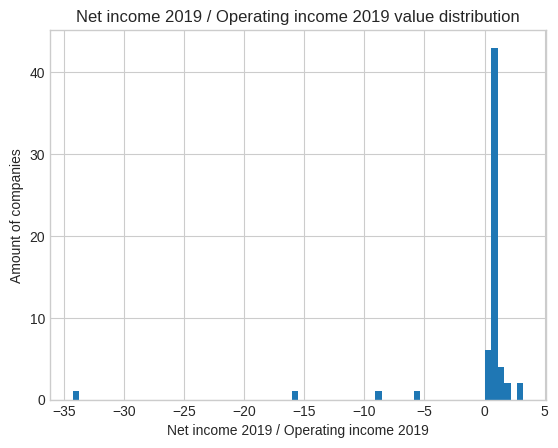

In [ ]:
plt.title('Net income 2019 / Operating income 2019 value distribution')
plt.xlabel('Net income 2019 / Operating income 2019')
plt.ylabel('Amount of companies')
clustering_dataset['Net income 2019 / Operating income 2019'].hist(bins=70)

In [ ]:
clusters = pd.DataFrame()
clusters['Ticker'] = clustering_dataset['Ticker']

In [ ]:
len(clustering_dataset.Ticker)

61

#### Final classification

In [ ]:
strings = []
for company in clustering_dataset['Ticker'].tolist():
  string_company = ""
  if company in categories_assets_low:
    string_company += "1"
  if company in categories_assets_middle:
    string_company += "2"
  if company in categories_assets_high:
    string_company += "3"
  if company in categories_shareholders_equity_low:
    string_company += "1"
  if company in categories_shareholders_equity_middle:
    string_company += "2"
  if company in categories_shareholders_equity_high:
    string_company += "3"
  if company in categories_operating_income_low:
    string_company += "1"
  if company in categories_operating_income_high:
    string_company += "2"
  strings.append(int(string_company))
  if string_company in ["111", "112", "121", "122", "211", "212"]:
    clusters.loc[clusters['Ticker'] == company, "Cluster_2019"] = 1
  if string_company in ["131", "132", "221", "222", "311", "312"]:
    clusters.loc[clusters['Ticker'] == company, "Cluster_2019"] = 2
  if string_company in ["332", "322", "232", "331", "321", "231"]:
    clusters.loc[clusters['Ticker'] == company, "Cluster_2019"] = 3
  # if string_company in ["11", "12", "21"]:
  #   clusters.loc[clusters['Ticker'] == company, "Cluster_2019"] = 1
  # if string_company in ["13", "22", "31"]:
  #   clusters.loc[clusters['Ticker'] == company, "Cluster_2019"] = 2
  # if string_company in ["23", "32", "33"]:
  #   clusters.loc[clusters['Ticker'] == company, "Cluster_2019"] = 3
print(set(strings))


{321, 322, 132, 231, 232, 331, 332, 111, 112, 211, 212, 121, 122, 221, 222}


In [ ]:
print(len(strings))

61


In [ ]:
print('Amount of companies in first cluster (worst financial condition) -', len(clusters.loc[clusters['Cluster_2019'] == 1, 'Ticker'].tolist()))

Amount of companies in first cluster (worst financial condition) - 25


In [ ]:
print('Amount of companies in second cluster (middle financial condition) -', len(clusters.loc[clusters['Cluster_2019'] == 2, 'Ticker'].tolist()))

Amount of companies in second cluster (middle financial condition) - 13


In [ ]:
print('Amount of companies in third cluster (best financial condition) -', len(clusters.loc[clusters['Cluster_2019'] == 3, 'Ticker'].tolist()))

Amount of companies in third cluster (best financial condition) - 23


### 2018

In [ ]:
clustering_dataset['Net income 2018 / Total assets 2018'] = economic_reports_dataset['Net income 2018'] / economic_reports_dataset['Total assets 2018']
clustering_dataset['Net income 2018 / Total shareholders\' equity 2018'] = economic_reports_dataset['Net income 2018'] / economic_reports_dataset['Total shareholders\' equity 2018']
clustering_dataset['Net income 2018 / Operating income 2018'] = economic_reports_dataset['Net income 2018'] / economic_reports_dataset['Operating income 2018']

#### Assets classification

In [ ]:
categories_assets = pd.qcut(clustering_dataset['Net income 2018 / Total assets 2018'], q=3, labels = ['Low', 'Middle', 'High'])

In [ ]:
clustering_dataset['Categories assets'] = categories_assets

In [ ]:
categories_assets_low = clustering_dataset.loc[clustering_dataset['Categories assets'] == 'Low', 'Ticker'].tolist()
print(clustering_dataset.loc[clustering_dataset['Categories assets'] == 'Low', 'Ticker'].tolist())

['ADSK', 'ADTN', 'ALNY', 'BSET', 'CONN', 'CSCO', 'EXPE', 'IRDM', 'JBLU', 'LXRX', 'MAT', 'MSTR', 'MTEX', 'NDAQ', 'NTAP', 'SAVE', 'SGEN', 'SRCL', 'SSNC', 'VIA', 'WDC']


In [ ]:
categories_assets_middle = clustering_dataset.loc[clustering_dataset['Categories assets'] == 'Middle', 'Ticker'].tolist()
print(clustering_dataset.loc[clustering_dataset['Categories assets'] == 'Middle', 'Ticker'].tolist())

['AKAM', 'AMZN', 'ATVI', 'BJRI', 'CHSCP', 'COST', 'FTNT', 'GILD', 'JBHT', 'MDLZ', 'MSFT', 'MYGN', 'NATI', 'NFLX', 'OLED', 'SNPS', 'TRIP', 'VRSK', 'WYNN', 'ZEUS']


In [ ]:
categories_assets_high = clustering_dataset.loc[clustering_dataset['Categories assets'] == 'High', 'Ticker'].tolist()
print(clustering_dataset.loc[clustering_dataset['Categories assets'] == 'High', 'Ticker'].tolist())

['AAPL', 'ADBE', 'AMGN', 'ANSS', 'BIIB', 'CDNS', 'EXPD', 'GOOGL', 'GRMN', 'INTC', 'INTU', 'LRCX', 'LULU', 'MU', 'NVDA', 'REGN', 'SCHN', 'STX', 'SWKS', 'TXN']


<Axes: title={'center': 'Net income 2018 / Total assets 2018 value distribution'}, xlabel='Net income 2018 / Total assets 2018', ylabel='Amount of companies'>

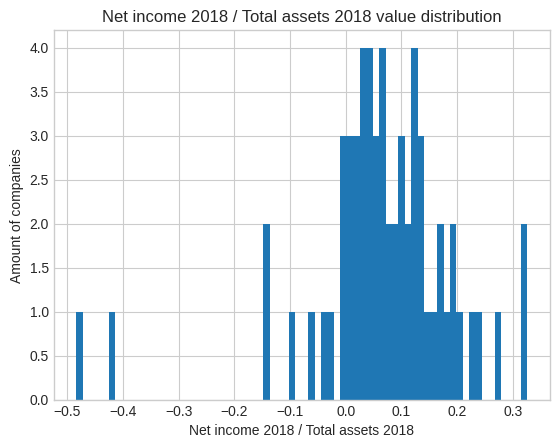

In [ ]:
plt.title('Net income 2018 / Total assets 2018 value distribution')
plt.xlabel('Net income 2018 / Total assets 2018')
plt.ylabel('Amount of companies')
clustering_dataset['Net income 2018 / Total assets 2018'].hist(bins=70)

#### Shareholders\' equity classification

In [ ]:
categories_shareholders_equity = pd.qcut(clustering_dataset['Net income 2018 / Total shareholders\' equity 2018'], q=3, labels = ['Low', 'Middle', 'High'])

In [ ]:
clustering_dataset['Categories equity'] = categories_shareholders_equity

In [ ]:
categories_shareholders_equity_low = clustering_dataset.loc[clustering_dataset['Categories equity'] == 'Low', 'Ticker'].tolist()
print(clustering_dataset.loc[clustering_dataset['Categories equity'] == 'Low', 'Ticker'].tolist())

['ADTN', 'AKAM', 'ALNY', 'BSET', 'CONN', 'CSCO', 'IRDM', 'JBLU', 'MAT', 'MSTR', 'MTEX', 'NDAQ', 'NTAP', 'OLED', 'SAVE', 'SGEN', 'SRCL', 'SSNC', 'TRIP', 'VIA', 'WDC']


In [ ]:
categories_shareholders_equity_middle = clustering_dataset.loc[clustering_dataset['Categories equity'] == 'Middle', 'Ticker'].tolist()
print(clustering_dataset.loc[clustering_dataset['Categories equity'] == 'Middle', 'Ticker'].tolist())

['AMZN', 'ANSS', 'ATVI', 'BJRI', 'CHSCP', 'COST', 'EXPE', 'GILD', 'GOOGL', 'GRMN', 'JBHT', 'MDLZ', 'MSFT', 'MYGN', 'NATI', 'NFLX', 'SCHN', 'SNPS', 'SWKS', 'ZEUS']


In [ ]:
categories_shareholders_equity_high = clustering_dataset.loc[clustering_dataset['Categories equity'] == 'High', 'Ticker'].tolist()
print(clustering_dataset.loc[clustering_dataset['Categories equity'] == 'High', 'Ticker'].tolist())

['AAPL', 'ADBE', 'ADSK', 'AMGN', 'BIIB', 'CDNS', 'EXPD', 'FTNT', 'INTC', 'INTU', 'LRCX', 'LULU', 'LXRX', 'MU', 'NVDA', 'REGN', 'STX', 'TXN', 'VRSK', 'WYNN']


<Axes: title={'center': "Net income 2018 / Total shareholders' equity 2018 value distribution"}, xlabel="Net income 2018 / Total shareholders' equity 2018", ylabel='Amount of companies'>

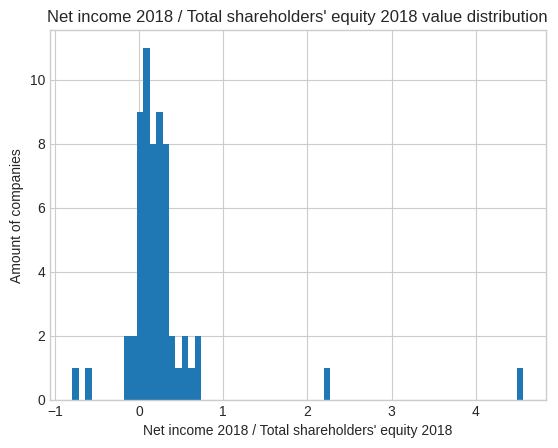

In [ ]:
plt.title('Net income 2018 / Total shareholders\' equity 2018 value distribution')
plt.xlabel('Net income 2018 / Total shareholders\' equity 2018')
plt.ylabel('Amount of companies')
clustering_dataset['Net income 2018 / Total shareholders\' equity 2018'].hist(bins=70)

#### Operating income classification

In [ ]:
categories_operating_income = pd.qcut(clustering_dataset['Net income 2018 / Operating income 2018'], q=2, labels = ['Low', 'High'])

In [ ]:
clustering_dataset['Categories operating income'] = categories_operating_income

In [ ]:
categories_operating_income_low = clustering_dataset.loc[clustering_dataset['Categories operating income'] == 'Low', 'Ticker'].tolist()
print(clustering_dataset.loc[clustering_dataset['Categories operating income'] == 'Low', 'Ticker'].tolist())

['ADTN', 'AMGN', 'AMZN', 'BIIB', 'BSET', 'CONN', 'COST', 'CSCO', 'EXPD', 'EXPE', 'GILD', 'INTU', 'IRDM', 'JBHT', 'JBLU', 'LRCX', 'LULU', 'MSFT', 'NDAQ', 'NFLX', 'NTAP', 'SAVE', 'SSNC', 'STX', 'SWKS', 'TRIP', 'VIA', 'VRSK', 'WDC', 'WYNN', 'ZEUS']


In [ ]:
categories_operating_income_high = clustering_dataset.loc[clustering_dataset['Categories operating income'] == 'High', 'Ticker'].tolist()
print(clustering_dataset.loc[clustering_dataset['Categories operating income'] == 'High', 'Ticker'].tolist())

['AAPL', 'ADBE', 'ADSK', 'AKAM', 'ALNY', 'ANSS', 'ATVI', 'BJRI', 'CDNS', 'CHSCP', 'FTNT', 'GOOGL', 'GRMN', 'INTC', 'LXRX', 'MAT', 'MDLZ', 'MSTR', 'MTEX', 'MU', 'MYGN', 'NATI', 'NVDA', 'OLED', 'REGN', 'SCHN', 'SGEN', 'SNPS', 'SRCL', 'TXN']


<Axes: title={'center': 'Net income 2018 / Operating income 2018 value distribution'}, xlabel='Net income 2018 / Operating income 2018', ylabel='Amount of companies'>

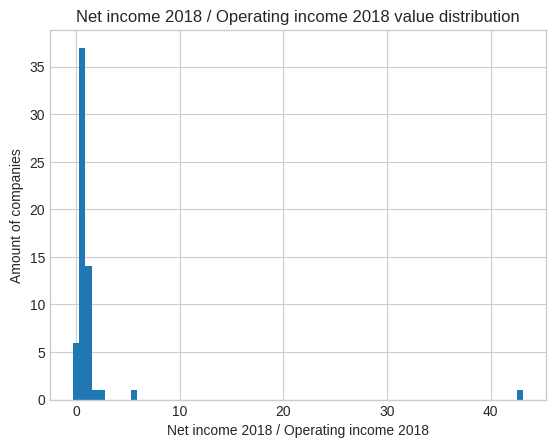

In [ ]:
plt.title('Net income 2018 / Operating income 2018 value distribution')
plt.xlabel('Net income 2018 / Operating income 2018')
plt.ylabel('Amount of companies')
clustering_dataset['Net income 2018 / Operating income 2018'].hist(bins=70)

#### Final classification

In [ ]:
strings = []
for company in clustering_dataset['Ticker'].tolist():
  string_company = ""
  if company in categories_assets_low:
    string_company += "1"
  if company in categories_assets_middle:
    string_company += "2"
  if company in categories_assets_high:
    string_company += "3"
  if company in categories_shareholders_equity_low:
    string_company += "1"
  if company in categories_shareholders_equity_middle:
    string_company += "2"
  if company in categories_shareholders_equity_high:
    string_company += "3"
  if company in categories_operating_income_low:
    string_company += "1"
  if company in categories_operating_income_high:
    string_company += "2"
  strings.append(int(string_company))
  if string_company in ["111", "112", "121", "122", "211", "212"]:
    clusters.loc[clusters['Ticker'] == company, "Cluster_2018"] = 1
  if string_company in ["131", "132", "221", "222", "311", "312"]:
    clusters.loc[clusters['Ticker'] == company, "Cluster_2018"] = 2
  if string_company in ["332", "322", "232", "331", "321", "231"]:
    clusters.loc[clusters['Ticker'] == company, "Cluster_2018"] = 3
  # if string_company in ["11", "12", "21"]:
  #   clusters.loc[clusters['Ticker'] == company, "Cluster_2018"] = 1
  # if string_company in ["13", "22", "31"]:
  #   clusters.loc[clusters['Ticker'] == company, "Cluster_2018"] = 2
  # if string_company in ["23", "32", "33"]:
  #   clusters.loc[clusters['Ticker'] == company, "Cluster_2018"] = 3

print(set(strings))


{321, 322, 132, 231, 232, 331, 332, 111, 112, 211, 212, 121, 221, 222}


In [ ]:
print('Amount of companies in first cluster (worst financial condition) -', len(clusters.loc[clusters['Cluster_2018'] == 1, 'Ticker'].tolist()))

Amount of companies in first cluster (worst financial condition) - 22


In [ ]:
print('Amount of companies in second cluster (middle financial condition) -', len( clusters.loc[clusters['Cluster_2018'] == 2, 'Ticker'].tolist()))

Amount of companies in second cluster (middle financial condition) - 16


In [ ]:
print('Amount of companies in third cluster (best financial condition) -', len( clusters.loc[clusters['Cluster_2018'] == 3, 'Ticker'].tolist()))

Amount of companies in third cluster (best financial condition) - 23


### 2017

In [ ]:
clustering_dataset['Net income 2017 / Total assets 2017'] = economic_reports_dataset['Net income 2017'] / economic_reports_dataset['Total assets 2017']
clustering_dataset['Net income 2017 / Total shareholders\' equity 2017'] = economic_reports_dataset['Net income 2017'] / economic_reports_dataset['Total shareholders\' equity 2017']
clustering_dataset['Net income 2017 / Operating income 2017'] = economic_reports_dataset['Net income 2017'] / economic_reports_dataset['Operating income 2017']

#### Assets classification

In [ ]:
categories_assets = pd.qcut(clustering_dataset['Net income 2017 / Total assets 2017'], q=3, labels = ['Low', 'Middle', 'High'])

In [ ]:
clustering_dataset['Categories assets'] = categories_assets

In [ ]:
categories_assets_low = clustering_dataset.loc[clustering_dataset['Categories assets'] == 'Low', 'Ticker'].tolist()
print(clustering_dataset.loc[clustering_dataset['Categories assets'] == 'Low', 'Ticker'].tolist())

['ADSK', 'ALNY', 'AMGN', 'AMZN', 'ATVI', 'CHSCP', 'CONN', 'EXPE', 'FTNT', 'LXRX', 'MAT', 'MSTR', 'MTEX', 'MYGN', 'NFLX', 'SGEN', 'SNPS', 'SRCL', 'TRIP', 'WDC', 'ZEUS']


In [ ]:
categories_assets_middle = clustering_dataset.loc[clustering_dataset['Categories assets'] == 'Middle', 'Ticker'].tolist()
print(clustering_dataset.loc[clustering_dataset['Categories assets'] == 'Middle', 'Ticker'].tolist())

['ADTN', 'AKAM', 'BJRI', 'BSET', 'CDNS', 'COST', 'CSCO', 'GILD', 'GOOGL', 'INTC', 'IRDM', 'MDLZ', 'NATI', 'NDAQ', 'NTAP', 'SCHN', 'SSNC', 'STX', 'VIA', 'WYNN']


In [ ]:
categories_assets_high = clustering_dataset.loc[clustering_dataset['Categories assets'] == 'High', 'Ticker'].tolist()
print(clustering_dataset.loc[clustering_dataset['Categories assets'] == 'High', 'Ticker'].tolist())

['AAPL', 'ADBE', 'ANSS', 'BIIB', 'EXPD', 'GRMN', 'INTU', 'JBHT', 'JBLU', 'LRCX', 'LULU', 'MSFT', 'MU', 'NVDA', 'OLED', 'REGN', 'SAVE', 'SWKS', 'TXN', 'VRSK']


<Axes: title={'center': 'Net income 2017 / Total assets 2017 value distribution'}, xlabel='Net income 2017 / Total assets 2017', ylabel='Amount of companies'>

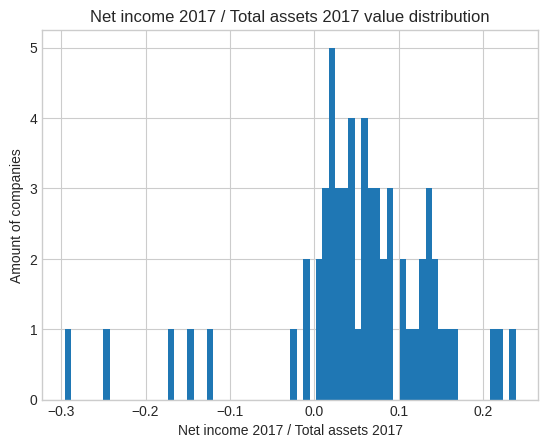

In [ ]:
plt.title('Net income 2017 / Total assets 2017 value distribution')
plt.xlabel('Net income 2017 / Total assets 2017')
plt.ylabel('Amount of companies')
clustering_dataset['Net income 2017 / Total assets 2017'].hist(bins=70)

#### Shareholders\' equity classification

In [ ]:
categories_shareholders_equity = pd.qcut(clustering_dataset['Net income 2017 / Total shareholders\' equity 2017'], q=3, labels = ['Low', 'Middle', 'High'])

In [ ]:
clustering_dataset['Categories equity'] = categories_shareholders_equity

In [ ]:
categories_shareholders_equity_low = clustering_dataset.loc[clustering_dataset['Categories equity'] == 'Low', 'Ticker'].tolist()
print(clustering_dataset.loc[clustering_dataset['Categories equity'] == 'Low', 'Ticker'].tolist())

['ADSK', 'ADTN', 'AKAM', 'ALNY', 'AMGN', 'ATVI', 'CHSCP', 'CONN', 'FTNT', 'LXRX', 'MAT', 'MSTR', 'MTEX', 'MYGN', 'NATI', 'SGEN', 'SNPS', 'SRCL', 'TRIP', 'WDC', 'ZEUS']


In [ ]:
categories_shareholders_equity_middle = clustering_dataset.loc[clustering_dataset['Categories equity'] == 'Middle', 'Ticker'].tolist()
print(clustering_dataset.loc[clustering_dataset['Categories equity'] == 'Middle', 'Ticker'].tolist())

['ADBE', 'AMZN', 'ANSS', 'BJRI', 'BSET', 'CSCO', 'EXPE', 'GOOGL', 'GRMN', 'INTC', 'IRDM', 'LULU', 'MDLZ', 'NDAQ', 'NFLX', 'NTAP', 'OLED', 'REGN', 'SCHN', 'SSNC']


In [ ]:
categories_shareholders_equity_high = clustering_dataset.loc[clustering_dataset['Categories equity'] == 'High', 'Ticker'].tolist()
print(clustering_dataset.loc[clustering_dataset['Categories equity'] == 'High', 'Ticker'].tolist())

['AAPL', 'BIIB', 'CDNS', 'COST', 'EXPD', 'GILD', 'INTU', 'JBHT', 'JBLU', 'LRCX', 'MSFT', 'MU', 'NVDA', 'SAVE', 'STX', 'SWKS', 'TXN', 'VIA', 'VRSK', 'WYNN']


<Axes: title={'center': "Net income 2017 / Total shareholders' equity 2017 value distribution"}, xlabel="Net income 2017 / Total shareholders' equity 2017", ylabel='Amount of companies'>

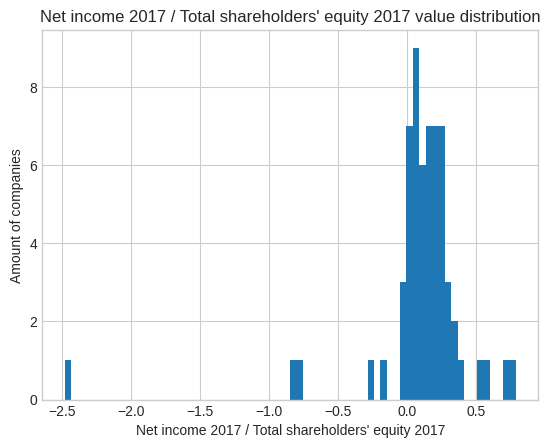

In [ ]:
plt.title('Net income 2017 / Total shareholders\' equity 2017 value distribution')
plt.xlabel('Net income 2017 / Total shareholders\' equity 2017')
plt.ylabel('Amount of companies')
clustering_dataset['Net income 2017 / Total shareholders\' equity 2017'].hist(bins=70)

#### Operating income classification

In [ ]:
categories_operating_income = pd.qcut(clustering_dataset['Net income 2017 / Operating income 2017'], q=2, labels = ['Low', 'High'])

In [ ]:
clustering_dataset['Categories operating income'] = categories_operating_income

In [ ]:
categories_operating_income_low = clustering_dataset.loc[clustering_dataset['Categories operating income'] == 'Low', 'Ticker'].tolist()
print(clustering_dataset.loc[clustering_dataset['Categories operating income'] == 'Low', 'Ticker'].tolist())

['ADTN', 'AKAM', 'AMGN', 'ANSS', 'ATVI', 'BIIB', 'BSET', 'CDNS', 'CHSCP', 'CONN', 'COST', 'EXPE', 'FTNT', 'GILD', 'GOOGL', 'INTC', 'LULU', 'MSTR', 'MTEX', 'MYGN', 'NATI', 'NFLX', 'REGN', 'SGEN', 'SNPS', 'SRCL', 'TRIP', 'TXN', 'VIA', 'VRSK', 'WDC']


In [ ]:
categories_operating_income_high = clustering_dataset.loc[clustering_dataset['Categories operating income'] == 'High', 'Ticker'].tolist()
print(clustering_dataset.loc[clustering_dataset['Categories operating income'] == 'High', 'Ticker'].tolist())

['AAPL', 'ADBE', 'ADSK', 'ALNY', 'AMZN', 'BJRI', 'CSCO', 'EXPD', 'GRMN', 'INTU', 'IRDM', 'JBHT', 'JBLU', 'LRCX', 'LXRX', 'MAT', 'MDLZ', 'MSFT', 'MU', 'NDAQ', 'NTAP', 'NVDA', 'OLED', 'SAVE', 'SCHN', 'SSNC', 'STX', 'SWKS', 'WYNN', 'ZEUS']


<Axes: title={'center': 'Net income 2017 / Operating income 2017 value distribution'}, xlabel='Net income 2017 / Operating income 2017', ylabel='Amount of companies'>

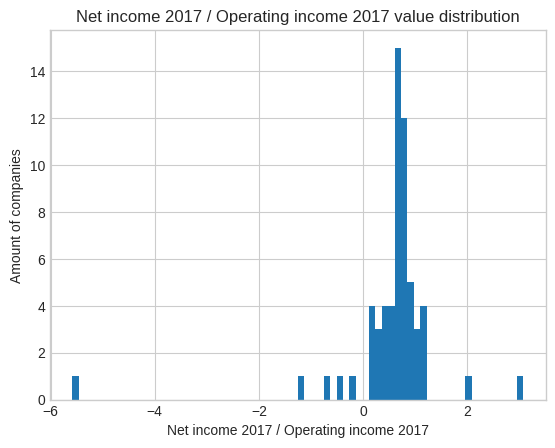

In [ ]:
plt.title('Net income 2017 / Operating income 2017 value distribution')
plt.xlabel('Net income 2017 / Operating income 2017')
plt.ylabel('Amount of companies')
clustering_dataset['Net income 2017 / Operating income 2017'].hist(bins=70)

#### Final classification

In [ ]:
strings = []
for company in clustering_dataset['Ticker'].tolist():
  string_company = ""
  if company in categories_assets_low:
    string_company += "1"
  if company in categories_assets_middle:
    string_company += "2"
  if company in categories_assets_high:
    string_company += "3"
  if company in categories_shareholders_equity_low:
    string_company += "1"
  if company in categories_shareholders_equity_middle:
    string_company += "2"
  if company in categories_shareholders_equity_high:
    string_company += "3"
  if company in categories_operating_income_low:
    string_company += "1"
  if company in categories_operating_income_high:
    string_company += "2"
  strings.append(int(string_company))
  if string_company in ["111", "112", "121", "122", "211", "212"]:
    clusters.loc[clusters['Ticker'] == company, "Cluster_2017"] = 1
  if string_company in ["131", "132", "221", "222", "311", "312"]:
    clusters.loc[clusters['Ticker'] == company, "Cluster_2017"] = 2
  if string_company in ["332", "322", "232", "331", "321", "231"]:
    clusters.loc[clusters['Ticker'] == company, "Cluster_2017"] = 3
  # if string_company in ["11", "12", "21"]:
  #   clusters.loc[clusters['Ticker'] == company, "Cluster_2017"] = 1
  # if string_company in ["13", "22", "31"]:
  #   clusters.loc[clusters['Ticker'] == company, "Cluster_2017"] = 2
  # if string_company in ["23", "32", "33"]:
  #   clusters.loc[clusters['Ticker'] == company, "Cluster_2017"] = 3
print(set(strings))


{321, 322, 231, 232, 331, 332, 111, 112, 211, 121, 122, 221, 222}


In [ ]:
print('Amount of companies in first cluster (worst financial condition) -', len(clusters.loc[clusters['Cluster_2017'] == 1, 'Ticker'].tolist()))

Amount of companies in first cluster (worst financial condition) - 24


In [ ]:
print('Amount of companies in second cluster (middle financial condition) -', len(clusters.loc[clusters['Cluster_2017'] == 2, 'Ticker'].tolist()))

Amount of companies in second cluster (middle financial condition) - 11


In [ ]:
print('Amount of companies in third cluster (best financial condition) -', len(clusters.loc[clusters['Cluster_2017'] == 3, 'Ticker'].tolist()))

Amount of companies in third cluster (best financial condition) - 26


In [ ]:
clusters = clusters.reset_index()

In [ ]:
print('Amount of companies, which have been at the same cluster for all 3 years', len(clusters.loc[clusters.iloc[:, 2:5].nunique(1).eq(1)]))

Amount of companies, which have been at the same cluster for all 3 years 27


In [ ]:
len(clusters)

61

In [ ]:
clusters

,index,Ticker,Cluster_2019,Cluster_2018,Cluster_2017
0,0,AAPL,3.0,3.0,3.0
1,2,ADBE,3.0,3.0,3.0
2,4,ADSK,2.0,2.0,1.0
3,5,ADTN,1.0,1.0,1.0
4,7,AKAM,2.0,1.0,1.0
5,8,ALNY,1.0,1.0,1.0
6,13,AMGN,3.0,3.0,1.0
7,14,AMZN,2.0,2.0,1.0
8,15,ANSS,2.0,3.0,3.0
9,17,ATVI,1.0,2.0,1.0


## Companies' 3-d adjacency matrix (for 3 years)

In [ ]:
matrix = np.zeros((61, 61, 3))

In [ ]:
for year in range(0, 3):
  for first_company in range(0, 61):
    for second_company in range(0, 61):
      if clusters.iloc[first_company, 4 - year] == clusters.iloc[second_company, 4 - year]:
        matrix[first_company, second_company, year] = 1


In [ ]:
print(matrix)

[[[1. 1. 1.]
  [1. 1. 1.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [1. 1. 0.]
  [0. 0. 0.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [1. 1. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [1. 1. 1.]
  ...
  [1. 0. 0.]
  [0. 0. 0.]
  [1. 1. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [1. 0. 0.]
  ...
  [1. 1. 1.]
  [0. 0. 1.]
  [1. 0. 1.]]

 [[1. 1. 0.]
  [1. 1. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 1.]
  [1. 1. 1.]
  [0. 0. 1.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [1. 1. 0.]
  ...
  [1. 0. 1.]
  [0. 0. 1.]
  [1. 1. 1.]]]


In [ ]:
np.save('2_variant_financial_reports_relations_3_years', matrix)

In [ ]:
relational_matrix = np.load('2_variant_financial_reports_relations_3_years.npy')

In [ ]:
relational_matrix.shape

(61, 61, 3)

In [ ]:
relational_matrix = relational_matrix.sum(axis = 2)

In [ ]:
relational_matrix.shape

(61, 61)

In [ ]:
relational_matrix

array([[3., 3., 0., ..., 0., 2., 0.],
       [3., 3., 0., ..., 0., 2., 0.],
       [0., 0., 3., ..., 1., 0., 2.],
       ...,
       [0., 0., 1., ..., 3., 1., 2.],
       [2., 2., 0., ..., 1., 3., 1.],
       [0., 0., 2., ..., 2., 1., 3.]])

In [ ]:
len(relational_matrix[relational_matrix == 0])

1348

In [ ]:
len(relational_matrix[relational_matrix == 1])

1214

In [ ]:
len(relational_matrix[relational_matrix == 3])

433

In [ ]:
len(relational_matrix[relational_matrix == 2])

726

In [ ]:
np.save('from_0_to_3_financial_reports_2d_relational_matrix', relational_matrix)

In [ ]:
relational_matrix = np.load('from_0_to_3_financial_reports_2d_relational_matrix.npy')

In [ ]:
relational_matrix.shape

(61, 61)

In [ ]:
relational_matrix

array([[3., 3., 0., ..., 0., 2., 0.],
       [3., 3., 0., ..., 0., 2., 0.],
       [0., 0., 3., ..., 1., 0., 2.],
       ...,
       [0., 0., 1., ..., 3., 1., 2.],
       [2., 2., 0., ..., 1., 3., 1.],
       [0., 0., 2., ..., 2., 1., 3.]])

In [ ]:
wiki_relation_tickers = pd.read_csv('2d_matrix_wiki_relation_tickers.csv')

FileNotFoundError: ignored

In [ ]:
wiki_relation_tickers

NameError: ignored

In [ ]:
for i in range(0, 61):
  if wiki_relation_tickers['0'].tolist()[i] != clusters.Ticker.tolist()[i]:
      print(False)
print(True)

True


## Classic Clustering algorithms

In [ ]:
reports_list = []
for ticker in economic_reports_dataset.index.tolist():
  company_report_statement = [economic_reports_dataset.at[ticker, 'Net income 2019'] / economic_reports_dataset.at[ticker, 'Total assets 2019'],
                              economic_reports_dataset.at[ticker, 'Net income 2019'] / economic_reports_dataset.at[ticker, 'Total shareholders\' equity 2019'],
                              economic_reports_dataset.at[ticker, 'Net income 2019'] / economic_reports_dataset.at[ticker, 'Operating income 2019']]
  reports_list.append(company_report_statement)


In [ ]:
reports_list = np.array(reports_list)

In [ ]:
#pca= PCA(n_components=2, random_state=42)
#X_pca = pca.fit_transform(reports_list)
distance_metrics = []
number_of_clusters = []
for n_clusters in range(2, 51, 2):
    k_means_clustering = KMeans(n_clusters=n_clusters)
    k_means_clustering.fit(reports_list)
    y_pred = k_means_clustering.predict(reports_list)
    distance = calculate_metric(reports_list, y_pred, k_means_clustering, n_clusters)
    distance_metrics.append(distance)
    number_of_clusters.append(n_clusters)
    print(n_clusters)

2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50


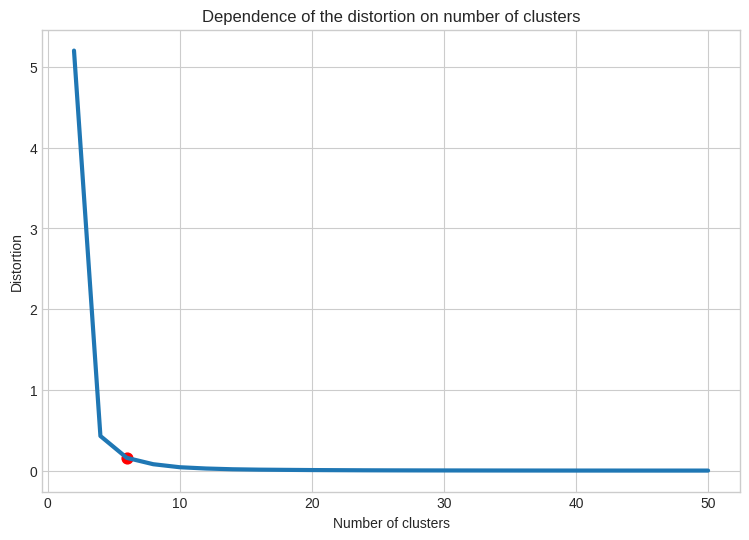

In [ ]:
plt.figure(figsize=(9, 6))
plt.plot(number_of_clusters, distance_metrics, linewidth=3)
plt.title('Dependence of the distortion on number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.scatter(6, distance_metrics[2], color='red', s=60, marker='o')
plt.savefig('distortion')

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_metrics = []
number_of_clusters = []
for n_clusters in range(2, 51):
    k_means_clustering = KMeans(n_clusters=n_clusters)
    y_pred = k_means_clustering.fit_predict(reports_list)
    score = silhouette_score(reports_list, y_pred)
    silhouette_metrics.append(score)
    number_of_clusters.append(n_clusters)
    print(n_clusters)

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


In [ ]:
optimal_number_of_clusters = silhouette_metrics.index(max(silhouette_metrics)) + 2

In [ ]:
print(optimal_number_of_clusters)

2


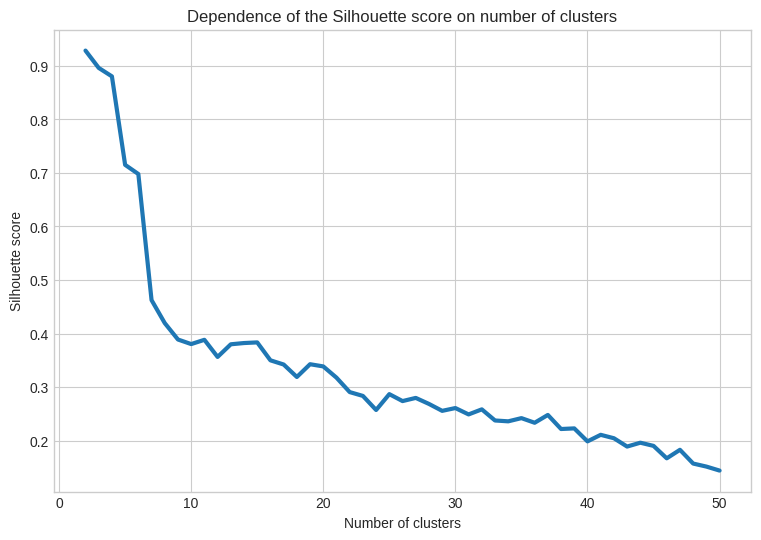

In [ ]:
plt.figure(figsize=(9, 6))
plt.plot(number_of_clusters, silhouette_metrics, linewidth=3)
plt.title('Dependence of the Silhouette score on number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.savefig('silhouette')

In [ ]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2)
y_pred_all = model.fit_predict(reports_list)

In [ ]:
silhouette_score(reports_list, y_pred_all)

0.9274285262936574

In [ ]:
y_pred_all

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
print(economic_reports_dataset.loc[y_pred_all == 0, 'Ticker'])
print('Length:', economic_reports_dataset.loc[y_pred_all == 0, 'Ticker'].shape[0])

82     IRDM
111    MSTR
Name: Ticker, dtype: object
Length: 2


In [ ]:
print(economic_reports_dataset.loc[y_pred_all == 1, 'Ticker'])
print('Length:', economic_reports_dataset.loc[y_pred_all == 1, 'Ticker'].shape[0])

0       AAPL
2       ADBE
4       ADSK
5       ADTN
7       AKAM
8       ALNY
13      AMGN
14      AMZN
15      ANSS
17      ATVI
19      BIIB
20      BJRI
25      BSET
29      CDNS
33     CHSCP
36      CONN
37      COST
39      CSCO
50      EXPD
51      EXPE
59      FTNT
61      GILD
62     GOOGL
63      GRMN
78      INTC
79      INTU
87      JBHT
88      JBLU
101     LRCX
103     LULU
104     LXRX
106      MAT
107     MDLZ
110     MSFT
112     MTEX
113       MU
114     MYGN
115     NATI
118     NDAQ
121     NFLX
124     NTAP
126     NVDA
128     OLED
151     REGN
158     SAVE
161     SCHN
162     SGEN
163     SNPS
166     SRCL
167     SSNC
168      STX
169     SWKS
173     TRIP
178      TXN
181      VIA
185     VRSK
188      WDC
191     WYNN
194     ZEUS
Name: Ticker, dtype: object
Length: 59


In [ ]:
print(economic_reports_dataset.loc[y_pred_all == 2, 'Ticker'])
print('Length:', economic_reports_dataset.loc[y_pred_all == 2, 'Ticker'].shape[0])

82    IRDM
Name: Ticker, dtype: object
Length: 1


In [ ]:
print(economic_reports_dataset.loc[y_pred_all == 3, 'Ticker'])
print('Length:', economic_reports_dataset.loc[y_pred_all == 3, 'Ticker'].shape[0])

106    MAT
Name: Ticker, dtype: object
Length: 1


In [ ]:
print(economic_reports_dataset.loc[y_pred_all == 4, 'Ticker'])
print('Length:', economic_reports_dataset.loc[y_pred_all == 4, 'Ticker'].shape[0])

4     ADSK
25    BSET
29    CDNS
Name: Ticker, dtype: object
Length: 3


In [ ]:
print(economic_reports_dataset.loc[y_pred_all == 5, 'Ticker'])
print('Length:', economic_reports_dataset.loc[y_pred_all == 5, 'Ticker'].shape[0])

188    WDC
Name: Ticker, dtype: object
Length: 1


In [ ]:
print(economic_reports_dataset.loc[y_pred_all == 6, 'Ticker'])
print('Length:', economic_reports_dataset.loc[y_pred_all == 6, 'Ticker'].shape[0])

0      AAPL
13     AMGN
104    LXRX
124    NTAP
168     STX
178     TXN
Name: Ticker, dtype: object
Length: 6


In [ ]:
print(economic_reports_dataset.loc[y_pred_all == 7, 'Ticker'])
print('Length:', economic_reports_dataset.loc[y_pred_all == 7, 'Ticker'].shape[0])

2       ADBE
7       AKAM
14      AMZN
15      ANSS
17      ATVI
19      BIIB
20      BJRI
33     CHSCP
37      COST
39      CSCO
50      EXPD
59      FTNT
61      GILD
62     GOOGL
63      GRMN
78      INTC
79      INTU
101     LRCX
103     LULU
107     MDLZ
110     MSFT
113       MU
115     NATI
118     NDAQ
121     NFLX
126     NVDA
128     OLED
151     REGN
163     SNPS
169     SWKS
Name: Ticker, dtype: object
Length: 30


In [ ]:
print(economic_reports_dataset.loc[y_pred_all == 8, 'Ticker'])
print('Length:', economic_reports_dataset.loc[y_pred_all == 8, 'Ticker'].shape[0])

29    CDNS
Name: Ticker, dtype: object
Length: 1


In [ ]:
print(economic_reports_dataset.loc[y_pred_all == 9, 'Ticker'])
print('Length:', economic_reports_dataset.loc[y_pred_all == 9, 'Ticker'].shape[0])

5      ADTN
8      ALNY
166    SRCL
Name: Ticker, dtype: object
Length: 3


In [ ]:
eps_values = []
silhouette_metrics = []
for x in range(10, 0, -1):
    eps = 1 / (11 - x)
    clustering = DBSCAN(eps=eps).fit(reports_list)
    score = silhouette_score(reports_list, clustering.labels_)
    silhouette_metrics.append(score)
    eps_values.append(eps)

In [ ]:
optimal_eps = eps_values[silhouette_metrics.index(max(silhouette_metrics))]
print(optimal_eps)

1.0


In [ ]:
eps_values

[1.0,
 0.5,
 0.3333333333333333,
 0.25,
 0.2,
 0.16666666666666666,
 0.14285714285714285,
 0.125,
 0.1111111111111111,
 0.1]

In [ ]:
silhouette_metrics

[0.8304534157834442,
 0.7657858890397526,
 0.6452434872737995,
 0.5851157880040703,
 0.4699889252572638,
 0.44245761237333414,
 0.3004956246752137,
 0.24445822733756536,
 0.13361371381033682,
 0.04901704345336717]

In [ ]:
clustering = DBSCAN(eps=1).fit(reports_list)
clustering.labels_

array([ 0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0, -1,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0])

In [ ]:
silhouette_score(reports_list, clustering.labels_)

0.8304534157834442

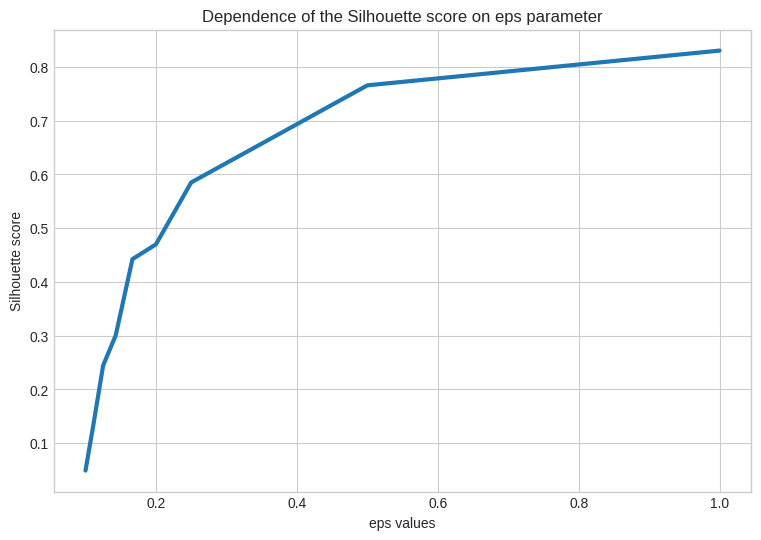

In [ ]:
plt.figure(figsize=(9, 6))
plt.plot(eps_values, silhouette_metrics, linewidth=3)
plt.title('Dependence of the Silhouette score on eps parameter')
plt.xlabel('eps values')
plt.ylabel('Silhouette score')
plt.savefig('eps')